In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
meta_df_1000 = pd.read_parquet('meta_df_1000_cleaned.parquet')
reviews_df = pd.read_parquet('reviews_df_clean.parquet')

In [3]:
merged_df = pd.merge(meta_df_1000, reviews_df, on='asin', how='inner')
merged_df['category_1'] = merged_df.category.apply(lambda x: x[1])
merged_df['rating'] = merged_df['rating'].astype(float)
merged_df.head()

,category,description,title_x,also_buy,brand,feature,rank,also_view,main_cat,date_x,...,title_y,content,date_y,author,rating,found_helpful,variant,verified_purchase,product,category_1
0,"[Electronics, eBook Readers & Accessories, Rea...",\n,"Thinking Gifts Folding Booklight, Blue, 1 unit...",[],,,"[[Books , 3,563,332]]",[],Books,,...,One Star,didn't work... If I could've given it zero sta...,2018-06-28,Margie,1.0,0,None,True,"Thinking Gifts Folding Booklight, Blue, 1 unit...",eBook Readers & Accessories
1,"[Electronics, eBook Readers & Accessories, Rea...",\n,"Thinking Gifts Folding Booklight, Blue, 1 unit...",[],,,"[[Books , 3,563,332]]",[],Books,,...,Great Bible book light,Gave as a gift to my brother who teaches Sunda...,2017-03-07,Dolphin6411,5.0,0,None,True,"Thinking Gifts Folding Booklight, Blue, 1 unit...",eBook Readers & Accessories
2,"[Electronics, eBook Readers & Accessories, Rea...",\n,"Thinking Gifts Folding Booklight, Blue, 1 unit...",[],,,"[[Books , 3,563,332]]",[],Books,,...,I also love this reading light,I also love this reading light. I've had mine...,2014-08-08,Nancy,5.0,1,None,False,"Thinking Gifts Folding Booklight, Blue, 1 unit...",eBook Readers & Accessories
3,"[Electronics, eBook Readers & Accessories, Rea...",\n,"Thinking Gifts Folding Booklight, Blue, 1 unit...",[],,,"[[Books , 3,563,332]]",[],Books,,...,Great Reading Light,I am buying the second one of these. I used th...,2011-10-24,James G.,5.0,7,None,False,"Thinking Gifts Folding Booklight, Blue, 1 unit...",eBook Readers & Accessories
4,"[Electronics, Accessories & Supplies, Audio & ...",Slim Port Adapter for LG G3 Smartphone! MyDP /...,SlimPort sli44532 Adapter for LG G3 Smartphone...,[],SlimPort,This SlimPort/MyDp adapter is specifically des...,[[Electronics > Accessories & Supplies > Audio...,"[B00HFYLR4M, B015DJ4QYI, 9791688974, B00B2HORK...",Computers,,...,Ease of use,Worked well,2022-10-22,Malcolm W. Collins,4.0,0,Color: Black,True,SlimPort sli44532 Adapter for LG G3 Smartphone...,Accessories & Supplies


In [13]:
merged_df_lr = merged_df[['price', 'found_helpful', 'rating']].dropna()
print (merged_df_lr.shape)
merged_df_lr.sample(10)

(3066, 3)


,price,found_helpful,rating
4293,10.94,0,5.0
3715,11.68,0,4.0
5095,9.49,5,4.0
5279,9.98,0,5.0
1475,4.32,0,4.0
1489,5.53,0,4.0
4405,6.41,0,5.0
4693,7.18,5,4.0
2670,24.47,0,5.0
4438,11.99,0,5.0


In [ ]:
lr_x = sm.add_constant(merged_df_lr[['price', 'found_helpful']])
lr_x

In [12]:
mod = sm.OLS(merged_df_lr['rating'], lr_x)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3606
Date:                Mon, 01 May 2023   Prob (F-statistic):              0.697
Time:                        15:26:01   Log-Likelihood:                -4898.4
No. Observations:                3066   AIC:                             9803.
Df Residuals:                    3063   BIC:                             9821.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1184      0.024    171.355

<AxesSubplot: xlabel='rating', ylabel='price'>

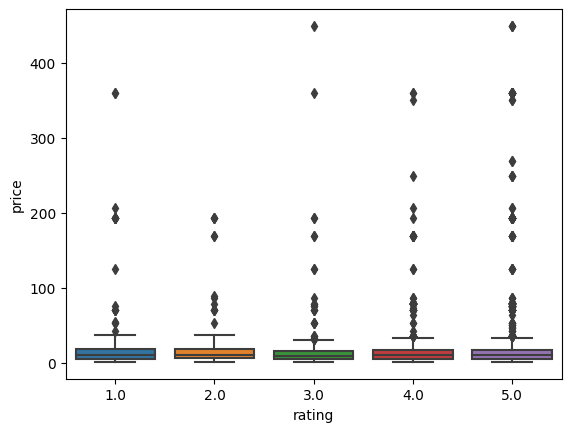

In [6]:
sns.boxplot(x = 'rating', y='price', data=merged_df_lr)

<AxesSubplot: xlabel='verified_purchase', ylabel='rating'>

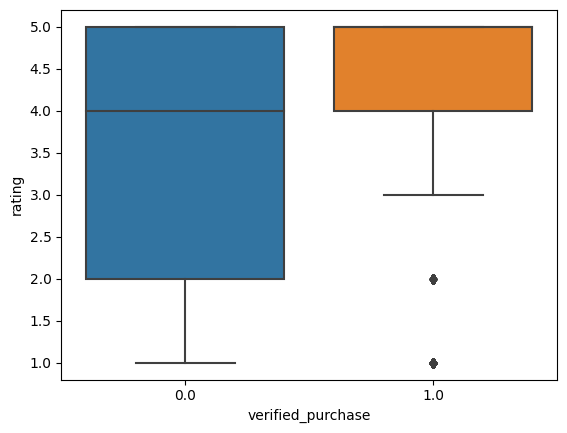

In [10]:
sns.boxplot(x = 'verified_purchase', y='rating', data=merged_df_lr)